#Titanic data analysis

In [202]:
import pandas as pd
import numpy as np

titanic_df = pd.read_csv("titanic_data.csv")

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
survivors = titanic_df[titanic_df.Survived == 1].copy()
non_survivors = titanic_df[titanic_df.Survived == 0].copy()
survivors.head()
survivors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


At this point we have the passengers that survived, we will analise their ages, and for this we have to be certain that all ages are ok.

In [205]:
survivors_age = survivors.dropna(subset = ["Age"])
non_survivors_age = non_survivors.dropna(subset = ["Age"])
passengers_age = titanic_df.dropna(subset = ["Age"])
survivors_age.info()
non_survivors_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  290 non-null    int64  
 1   Survived     290 non-null    int64  
 2   Pclass       290 non-null    int64  
 3   Name         290 non-null    object 
 4   Sex          290 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        290 non-null    int64  
 7   Parch        290 non-null    int64  
 8   Ticket       290 non-null    object 
 9   Fare         290 non-null    float64
 10  Cabin        125 non-null    object 
 11  Embarked     288 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 29.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  424 non-null    int64  
 1   Survived

So we have 290 passengers with non-null age and now we will see the mean age of them and put in a graph

In [206]:
survivors_mean = survivors_age.Age.mean()
non_survivors_mean = non_survivors_age.mean()
passengers_mean = passengers_age.Age.mean()
passengers_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


29.69911764705882

Text(0.5, 1.0, 'Mean age of survivors')

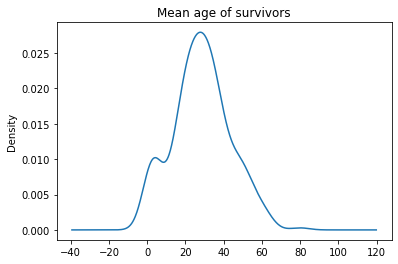

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

survivors_age.Age.plot.kde()
plt.title('Mean age of survivors')

Text(0.5, 1.0, 'Mean age of non survivors')

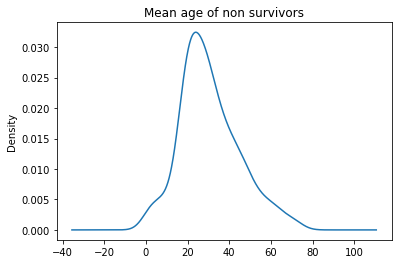

In [208]:
non_survivors_age.Age.plot.kde()
plt.title('Mean age of non survivors')

Text(0.5, 1.0, 'Mean age of all passengers')

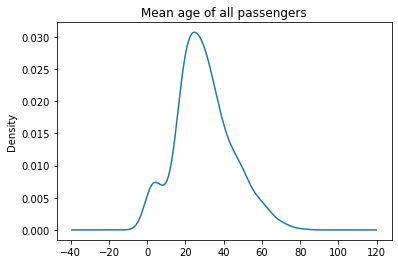

In [209]:
passengers_age.Age.plot.kde()
plt.title('Mean age of all passengers')

Text(0.5, 1.0, 'Relation of mean ages')

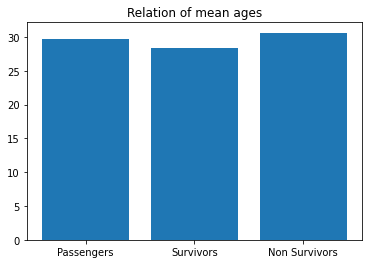

In [210]:
bars = ['Passengers', 'Survivors', 'Non Survivors']
heigth = [passengers_age.Age.mean(), survivors_age.Age.mean(), non_survivors_age.Age.mean()]
plt.bar(bars, heigth)
plt.title('Relation of mean ages')

In [211]:
male_survivors = survivors[survivors.Sex == 'male'].copy()
female_survivors = survivors[survivors.Sex == 'female'].copy()
male_non_survivors = non_survivors[non_survivors.Sex == 'male'].copy()
female_non_survivors = non_survivors[non_survivors.Sex == 'female'].copy()
male_survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


Text(0.5, 1.0, 'Relation of gender between survivors and non survivors')

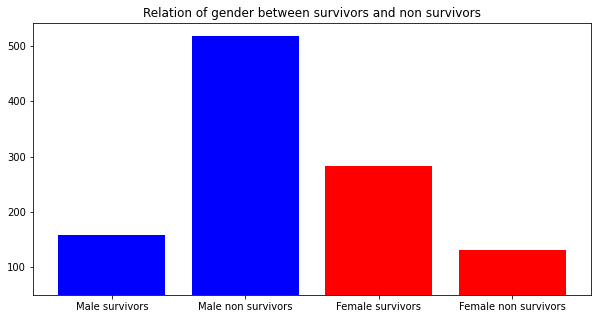

In [212]:
plt.figure(figsize=(10,5))
bars = ['Male survivors', 'Male non survivors', 'Female survivors', 'Female non survivors']
c = ['blue', 'blue', 'red', 'red']
columns = [len(male_survivors), len(male_non_survivors), len(female_survivors), len(female_non_survivors)]
plt.bar(bars, columns,bottom=50, color = c)
plt.title('Relation of gender between survivors and non survivors')

We can make a lot of analysis with this data beyond than that we already did because we have a lot of variables and a lot of scenarios, we can look the age mean of male non survivors for example, but as we've already look the age we will proceed to another variables.

Now we will look the Pclass of passengers and how this influenced to survive.

Text(0.5, 1.0, 'Pclass of survivors')

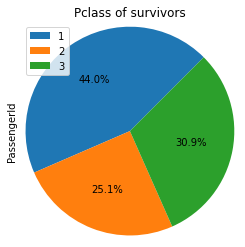

In [213]:
survivors.groupby(['Pclass']).sum().plot(kind='pie', labels=None, y='PassengerId', autopct='%1.1f%%', radius = 1.2, startangle=45)
plt.title('Pclass of survivors')


Text(0.5, 1.0, 'Pclass of non survivors')

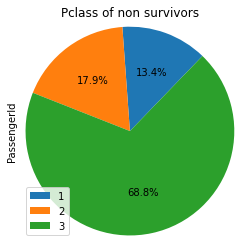

In [214]:
non_survivors.groupby(['Pclass']).sum().plot(kind='pie', labels=None, y='PassengerId', autopct='%1.1f%%', radius = 1.2, startangle=46)
plt.title('Pclass of non survivors')